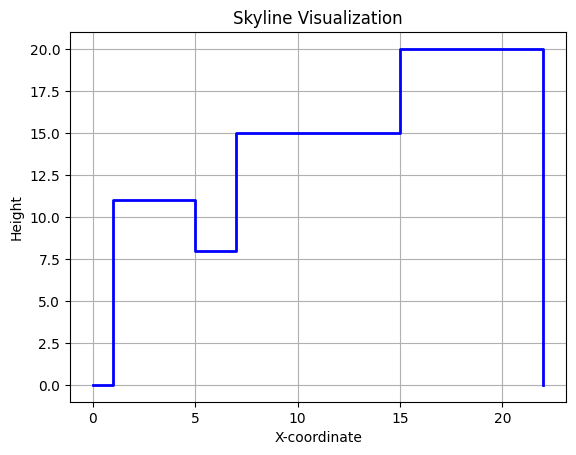

Skyline for the given buildings is:
(1,11)(4,8)(2,15)(8,20)(7,0)


In [ ]:
# Define a class for a Building object with left, height, and right attributes
class Building:
    def __init__(self, left, height, right):
        self.left = left
        self.height = height
        self.right = right

# Define a class for a Strip object with left and height attributes
class Strip:
    def __init__(self, left=0, height=0):
        self.left = left
        self.height = height

# Define a class for a Skyline object
class SkyLine:
    def __init__(self, capacity):
        self.strips = []  # Initialize an empty list to store strips
        self.capacity = capacity  # Store the capacity of the Skyline
        self.size = 0  # Initialize the size of the Skyline

    # Method to get the size of the Skyline
    def size(self):
        return self.size

    # Method to merge two Skyline objects
    def merge(self, other):
        result = SkyLine(self.size + other.size)  # Create a new Skyline object with combined capacity
        height1, height2, i, j = 0, 0, 0, 0

        # Merge the strips from both Skylines in order
        while i < self.size and j < other.size:
            if self.strips[i].left < other.strips[j].left:
                x1, height1 = self.strips[i].left, self.strips[i].height
                max_height = max(height1, height2)
                result.append(Strip(x1, max_height))
                i += 1
            else:
                x2, height2 = other.strips[j].left, other.strips[j].height
                max_height = max(height1, height2)
                result.append(Strip(x2, max_height))
                j += 1

        # Add remaining strips from both Skylines
        while i < self.size:
            result.append(self.strips[i])
            i += 1

        while j < other.size:
            result.append(other.strips[j])
            j += 1

        return result

    # Method to append a strip to the Skyline
    def append(self, strip):
        # Check if the new strip is redundant or can be merged with the last strip
        if self.size > 0 and self.strips[self.size - 1].height == strip.height:
            return

        if self.size > 0 and self.strips[self.size - 1].left == strip.left:
            self.strips[self.size - 1].height = max(self.strips[self.size - 1].height, strip.height)
            return

        # Append the new strip to the Skyline
        self.strips.append(strip)
        self.size += 1

    # Method to print the Skyline
    def print_skyline(self):
        print("Skyline for the given buildings is:")
        for i in range(self.size):
            print("({},{})".format(self.strips[i].left, self.strips[i].height), end="")
        print()

    def draw_skyline(self):
        import matplotlib.pyplot as plt

        x_values = []
        y_values = []

         # Add the starting vertical line if the first strip starts above height 0
        if self.strips[0].left > 0 or self.strips[0].height > 0:
            x_values.append(0)  # Start from x = 0
            y_values.append(0)  # Ground height
            x_values.append(self.strips[0].left)  # Vertical line to first building
            y_values.append(0)  # Ground height
            x_values.append(self.strips[0].left)
            y_values.append(self.strips[0].height)

        for i in range(len(self.strips)):
            if i > 0:
                x_values.append(self.strips[i].left)
                y_values.append(self.strips[i - 1].height)
            x_values.append(self.strips[i].left)
            y_values.append(self.strips[i].height)

        plt.step(x_values, y_values, where='post', color='blue', linewidth=2)
        plt.xlabel("X-coordinate")
        plt.ylabel("Height")
        plt.title("Skyline Visualization")
        plt.grid(True)
        plt.show()

# Function to recursively find the skyline of a set of buildings
def find_skyline(buildings, left, right):
    if left == right:
        result = SkyLine(2)
        result.append(Strip(buildings[left].left, buildings[left].height))
        result.append(Strip(buildings[left].right, 0))
        return result

    mid = (left + right) // 2
    skyline_left = find_skyline(buildings, left, mid)
    skyline_right = find_skyline(buildings, mid + 1, right)
    result = skyline_left.merge(skyline_right)

    return result

# Function to calculate the differences between adjacent x-coordinates in a Skyline
def find_DeltaX(skyline):
     i = 0
     while i < skyline1.size - 1:
            x1 = skyline1.strips[i].left
            x2 = skyline1.strips[i+1].left
            DeltaX = x2 - x1
            skyline2.strips[i+1].left = DeltaX
            i += 1


     return skyline2

# Define a list of buildings
buildings = [Building(1, 11, 5), Building(3, 8, 10), Building(7, 15, 20), Building(15, 20, 22)]
n = len(buildings)

# Find the skyline for the given buildings
skyline1 = find_skyline(buildings, 0, n - 1)
skyline1.draw_skyline()

# Calculate the differences between adjacent x-coordinates and update the second skyline
skyline2 = find_skyline(buildings, 0, n - 1)
skyline2 = find_DeltaX(skyline1)
skyline2.print_skyline()
